In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from scipy import spatial
sys.path.append("../gotmtool")
from gotmtool import *

## Load data

In [2]:
# dataroot = '/Volumes/WD02/SaildroneFlux/data'
dataroot = '../ERA5_plus_STD-2h'
sd_filename = 'era5flux.nc'
argo_filename = 'argo_along_sd.nc'

In [3]:
sd_ds = xr.open_dataset(os.path.join(dataroot, sd_filename))
argo_ds = xr.open_dataset(os.path.join(dataroot, argo_filename))

In [4]:
sd_ds

<xarray.Dataset>
Dimensions:  (time: 1285)
Coordinates:
  * time     (time) float64 31.02 31.06 31.1 31.15 ... 84.4 84.44 84.48 84.52
Data variables:
    lon      (time) float64 ...
    lat      (time) float64 ...
    qlat     (time) float64 ...
    qsens    (time) float64 ...
    lw       (time) float64 ...
    sw       (time) float64 ...
    tau      (time) float64 ...
    U        (time) float64 ...
    Udir     (time) float64 ...

In [5]:
argo_ds

<xarray.Dataset>
Dimensions:  (lev: 1000, time: 158)
Coordinates:
  * lev      (lev) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * time     (time) float64 31.9 31.7 31.59 31.1 ... 86.2 88.55 89.33 89.09
Data variables:
    z        (time, lev) float64 ...
    temp     (time, lev) float64 ...
    salt     (time, lev) float64 ...
    lon      (time) float64 ...
    lat      (time) float64 ...

## Save shortwave radiation

In [6]:
year = 2019
doy = sd_ds.time.data
dttime_sd = [(pd.to_datetime(year*1000 + np.floor(d), format='%Y%j') 
             + pd.to_timedelta((d-np.floor(d))*86400, unit='S')) for d in doy]
dat_dump_ts(dttime_sd,
            [sd_ds.sw.data],
            os.path.join(dataroot, 'swr_era5.dat'),
            skip_value=np.nan)

## Argo T/S profiles, heat and momentum fluxes at selected locations

In [7]:
idx_sd = np.arange(24,1200,4)

In [8]:
print('Indices = {}'.format(idx_sd))
print('Time = {}'.format(sd_ds.time[idx_sd].data))

Indices = [  24   28   32   36   40   44   48   52   56   60   64   68   72   76
   80   84   88   92   96  100  104  108  112  116  120  124  128  132
  136  140  144  148  152  156  160  164  168  172  176  180  184  188
  192  196  200  204  208  212  216  220  224  228  232  236  240  244
  248  252  256  260  264  268  272  276  280  284  288  292  296  300
  304  308  312  316  320  324  328  332  336  340  344  348  352  356
  360  364  368  372  376  380  384  388  392  396  400  404  408  412
  416  420  424  428  432  436  440  444  448  452  456  460  464  468
  472  476  480  484  488  492  496  500  504  508  512  516  520  524
  528  532  536  540  544  548  552  556  560  564  568  572  576  580
  584  588  592  596  600  604  608  612  616  620  624  628  632  636
  640  644  648  652  656  660  664  668  672  676  680  684  688  692
  696  700  704  708  712  716  720  724  728  732  736  740  744  748
  752  756  760  764  768  772  776  780  784  788  792  796  800  

In [9]:
# nearest argo points
argo_tree = spatial.KDTree(list(zip(argo_ds.lon.data, argo_ds.lat.data)))
pts = np.array([sd_ds.lon.data[idx_sd], sd_ds.lat.data[idx_sd]]).transpose()
nearest_dist, nearest_ind = argo_tree.query(pts, k=1)

In [10]:
nearest_ind

array([145, 145, 145, 145, 145, 145, 145, 145,  34,  34,  34,  34,  34,
        34,  34,  34,  34,  34,  34,  34,  34,  34,  67,  67,  67,  67,
        67,  67,  91,  91,  91,  91,  91,  91,  91,  91,  91,  40,  40,
        40,  40,  40,  40,  40,   3,   3,   3,  27,  15, 100, 100, 124,
       124, 155, 155,  54, 130, 130,  20,  55,  55,  55,  65, 112,  96,
       137, 133,   8,   8,  39, 118, 143, 143, 143, 143, 143, 143,  29,
        29,  29,  29,  29,  29,  29,  29,  29,  60,  60,  60,  60,  17,
        17,  17,  17, 135, 135, 135,  48,  48,  48,  48,  48,  48, 157,
       157, 134, 134, 134, 134, 134, 134, 134, 134, 147, 151, 151, 151,
       151, 151, 151, 151, 123,  98,  98,  98,  98,  98,  98,  98,  98,
        75,  73,  53,  53,  53,  43,  43,  43,  76,  76,  12, 101, 101,
       101, 101, 101,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,
        84, 109, 109, 109, 109, 109, 136, 104,  45,  45,  45, 154, 154,
       154,  90,  90,   9,  38,   2,  68,  99, 122, 122, 150, 15

Text(0, 0.5, 'lat')

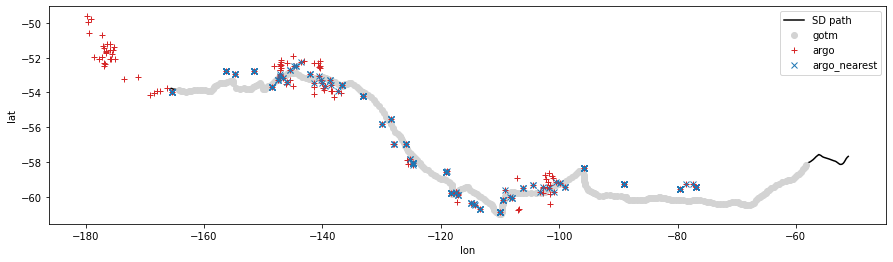

In [11]:
fig = plt.figure(figsize=[15, 4])
sdlon = sd_ds.lon
sdlat = sd_ds.lat
plt.plot(sdlon, sdlat, 'k', label='SD path')
plt.plot(sdlon[idx_sd], sdlat[idx_sd], 'o', color='lightgray', label='gotm')
argolon = argo_ds.lon
argolat = argo_ds.lat
plt.plot(argolon, argolat, '+', color='tab:red', label='argo')
plt.plot(argolon[nearest_ind], argolat[nearest_ind], 'x', color='tab:blue', label='argo_nearest')
plt.legend()
plt.xlabel('lon')
plt.ylabel('lat')

(-500.0, 0.0)

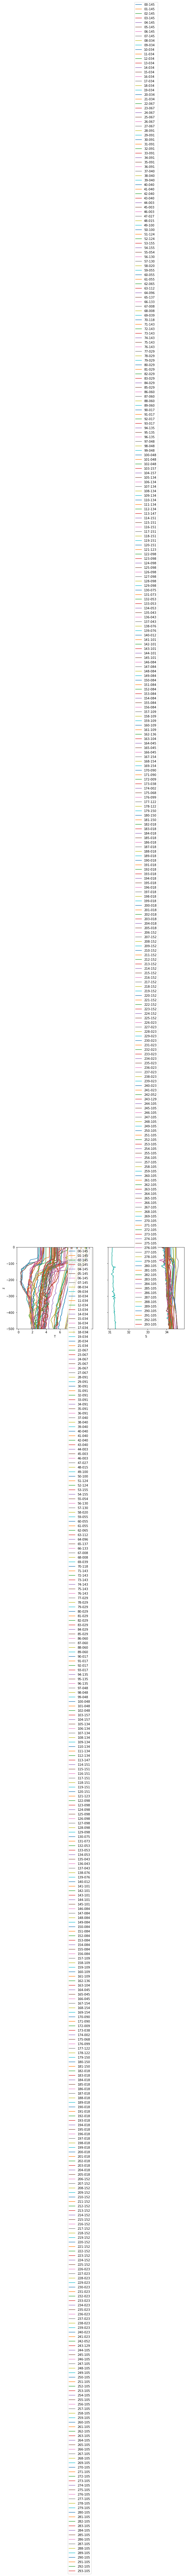

In [12]:
fig, axarr = plt.subplots(1,2, sharey='row')
fig.set_size_inches([10,5])
for i,idx in enumerate(nearest_ind):
    tpfl = argo_ds.temp[idx,:]
    spfl = argo_ds.salt[idx,:]
    z = argo_ds.z[idx,:]
    axarr[0].plot(tpfl, z, label='{:02d}-{:03d}'.format(i, idx))
    axarr[1].plot(spfl, z, label='{:02d}-{:03d}'.format(i, idx))
axarr[0].legend()
axarr[1].legend()
axarr[0].set_xlabel('T')
axarr[1].set_xlabel('S')
axarr[0].set_ylabel('z')
axarr[0].set_ylim([-500, 0])

### Save data

In [13]:
year = 2019
zbot = -500
for i,idx in enumerate(idx_sd):
    cname = 'C{:04d}'.format(idx)
    argo_idx = nearest_ind[i]
    print(cname)
    dttime_argo = pd.to_datetime(year*1000 + sd_ds.time.data[idx], format='%Y%j')
    zz = argo_ds.z[argo_idx,:].data
    zidx = np.nanargmin(np.abs(zz-zbot))
    zz_argo = zz[:zidx]
    os.makedirs(os.path.join(dataroot, cname), exist_ok=True)
    dat_dump_pfl([dttime_argo],
                 zz_argo,
                 [argo_ds.temp[argo_idx:argo_idx+1,:zidx].data],
                 os.path.join(dataroot, cname, 't_prof.dat'),
                 skip_value=np.nan)
    dat_dump_pfl([dttime_argo],
                 zz_argo,
                 [argo_ds.salt[argo_idx:argo_idx+1,:zidx].data],
                 os.path.join(dataroot, cname, 's_prof.dat'),
                 skip_value=np.nan)
    hf = (sd_ds.qlat+sd_ds.qsens+sd_ds.lw).data[idx]
    tau = sd_ds.tau.data[idx]
    with open(os.path.join(dataroot, cname, 'config.dat'), 'w') as f:
        f.write('{}\n {:6.2f} {:6.2f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}'.format(
            dttime_argo.strftime('%Y-%m-%d %H:%M:%S'),
            sd_ds.lon.data[idx], sd_ds.lat.data[idx],
            hf, tau, sd_ds.qlat.data[idx], sd_ds.qsens.data[idx]))

C0024
C0028
C0032
C0036
C0040
C0044
C0048
C0052
C0056
C0060
C0064
C0068
C0072
C0076
C0080
C0084
C0088
C0092
C0096
C0100
C0104
C0108
C0112
C0116
C0120
C0124
C0128
C0132
C0136
C0140
C0144
C0148
C0152
C0156
C0160
C0164
C0168
C0172
C0176
C0180
C0184
C0188
C0192
C0196
C0200
C0204
C0208
C0212
C0216
C0220
C0224
C0228
C0232
C0236
C0240
C0244
C0248
C0252
C0256
C0260
C0264
C0268
C0272
C0276
C0280
C0284
C0288
C0292
C0296
C0300
C0304
C0308
C0312
C0316
C0320
C0324
C0328
C0332
C0336
C0340
C0344
C0348
C0352
C0356
C0360
C0364
C0368
C0372
C0376
C0380
C0384
C0388
C0392
C0396
C0400
C0404
C0408
C0412
C0416
C0420
C0424
C0428
C0432
C0436
C0440
C0444
C0448
C0452
C0456
C0460
C0464
C0468
C0472
C0476
C0480
C0484
C0488
C0492
C0496
C0500
C0504
C0508
C0512
C0516
C0520
C0524
C0528
C0532
C0536
C0540
C0544
C0548
C0552
C0556
C0560
C0564
C0568
C0572
C0576
C0580
C0584
C0588
C0592
C0596
C0600
C0604
C0608
C0612
C0616
C0620
C0624
C0628
C0632
C0636
C0640
C0644
C0648
C0652
C0656
C0660
C0664
C0668
C0672
C0676
C0680
C0684
C068

### Save case list

In [14]:
with open(os.path.join(dataroot, 'caselist.txt'), 'w') as f:
    for idx in idx_sd:
        cname = 'C{:04d}\n'.format(idx)
        f.write(cname)